Machine Learning Final Project

This code highlights the steps used to create a model to predict house prices.

---



Team members: Alihusain Shafi, Vedant Kulkarni, Athulya Surendran





In [1]:
#importing the zip file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import scipy.stats as st
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc, r2_score
from sklearn.preprocessing import StandardScaler


Reading the Train Data on which we will create the model

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking for Null Values in the dataset
train_data[train_data.columns[train_data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
#dropping the columns that have high number of null values
train_data = train_data.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis=1)

In [6]:
#summarizing the data
train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


*We can see that there are 1460 rows of data with maximum of 215245 sqf.ft. lot area built across years 1872 - 2010 and sold from 2006 - 2010.*

###Understanding the Data

Lets explore variation in variables by plotting histograms for numerical variables and distribution of different categories for categorical data

In [7]:
#creating a datframe with numerical columns for data exploration/visualization
numerical_data = train_data.select_dtypes(include=np.number)
numerical_data = numerical_data.iloc[:,1:]

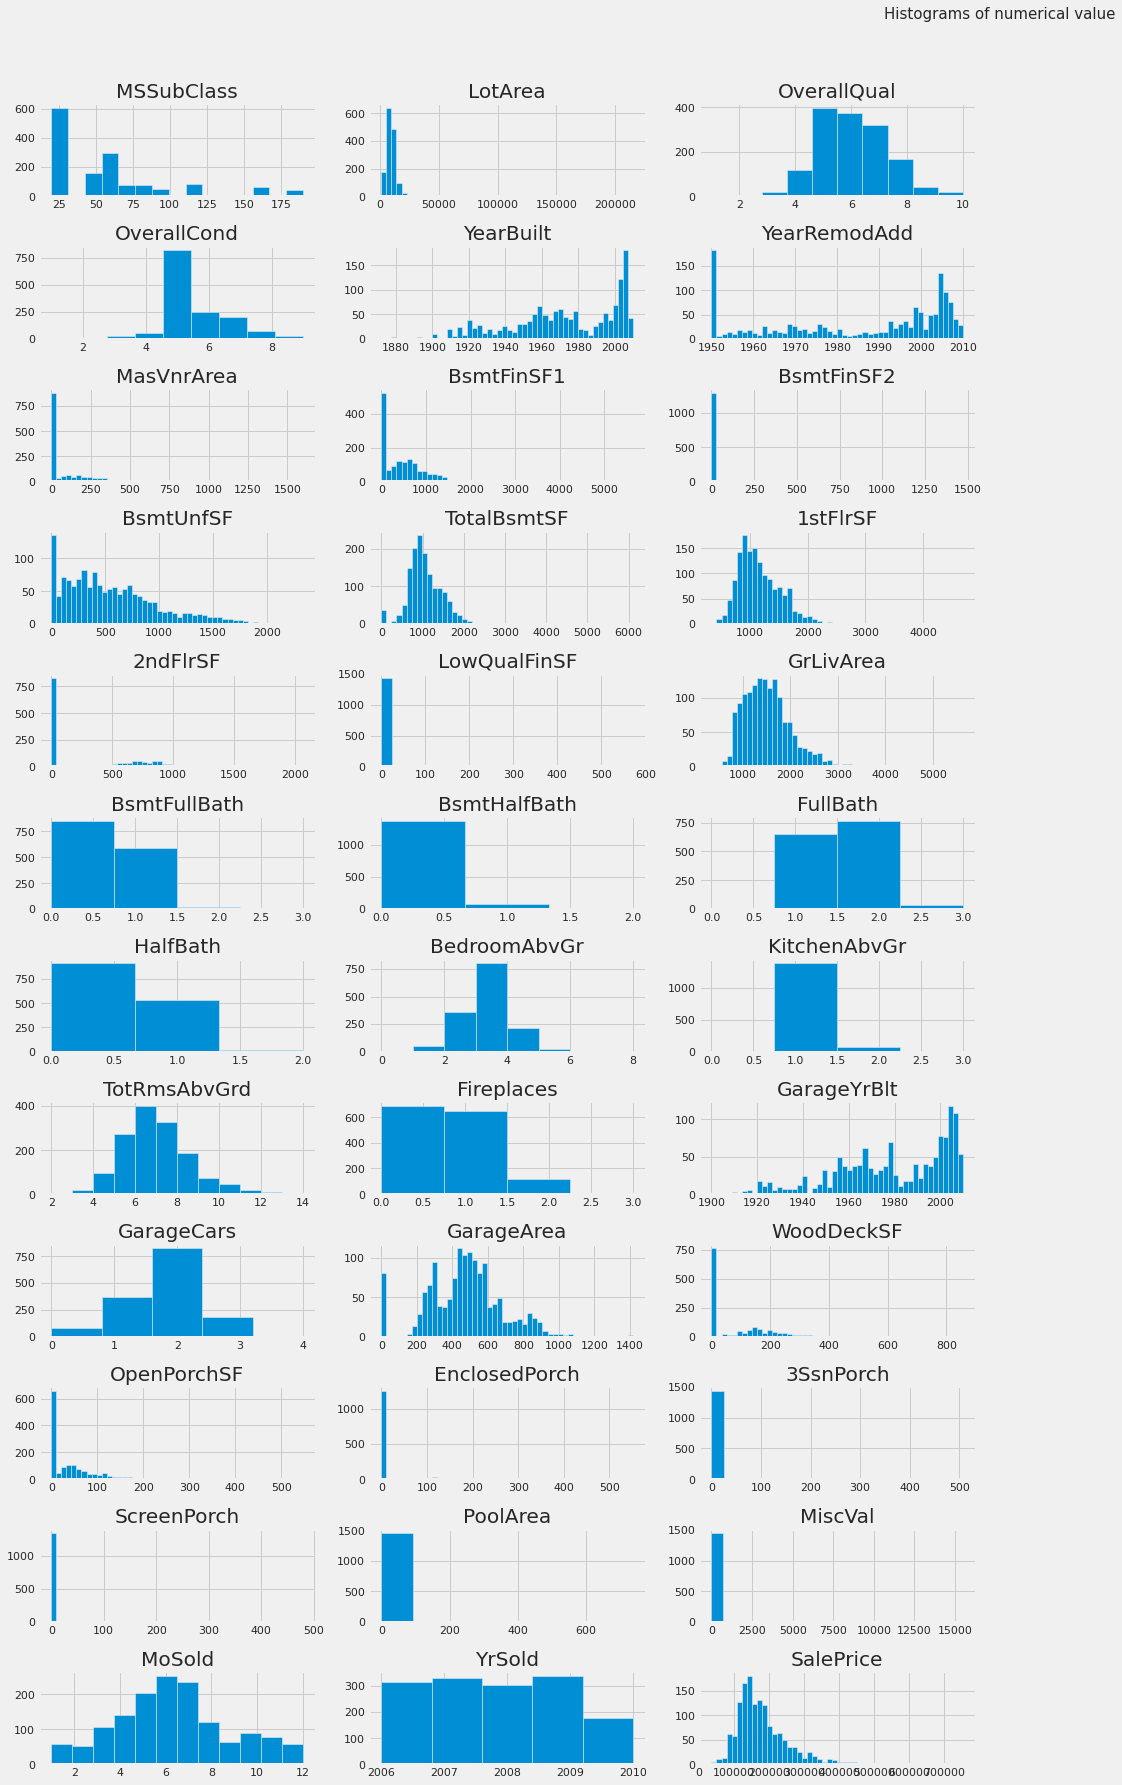

In [85]:
fig = plt.figure(figsize=(28,28))
plt.suptitle("Histograms of numerical value", fontsize=15)
for i in range(numerical_data.shape[1]):
    plt.subplot(13,3,i+1)
    f= plt.gca()
    f.set_title(numerical_data.columns.values[i])
    vals = np.size(numerical_data.iloc[:,i].unique())
    if vals>50:
        vals=50
    plt.hist(numerical_data.iloc[:,i], bins=vals)
plt.tight_layout(rect=[0,0.03,0.5,0.95])
plt.show()

*SalePrice: Sale price is right-skewed and average sales price is around 180,000 Million. Sales reach their peak around mid-year (Months 5-7/May-July).* 

*YrSold: The 2008 financial crisis impact is visible on YrSold (peaks at early 2008, falls down nearly half by 2010)*

*Overall condition is right skewed while overall quality is normally distributed*


In [9]:
#creating a datframe with Categorical columns for data exploration/visualization
categorical_data = train_data.select_dtypes(exclude=np.number)

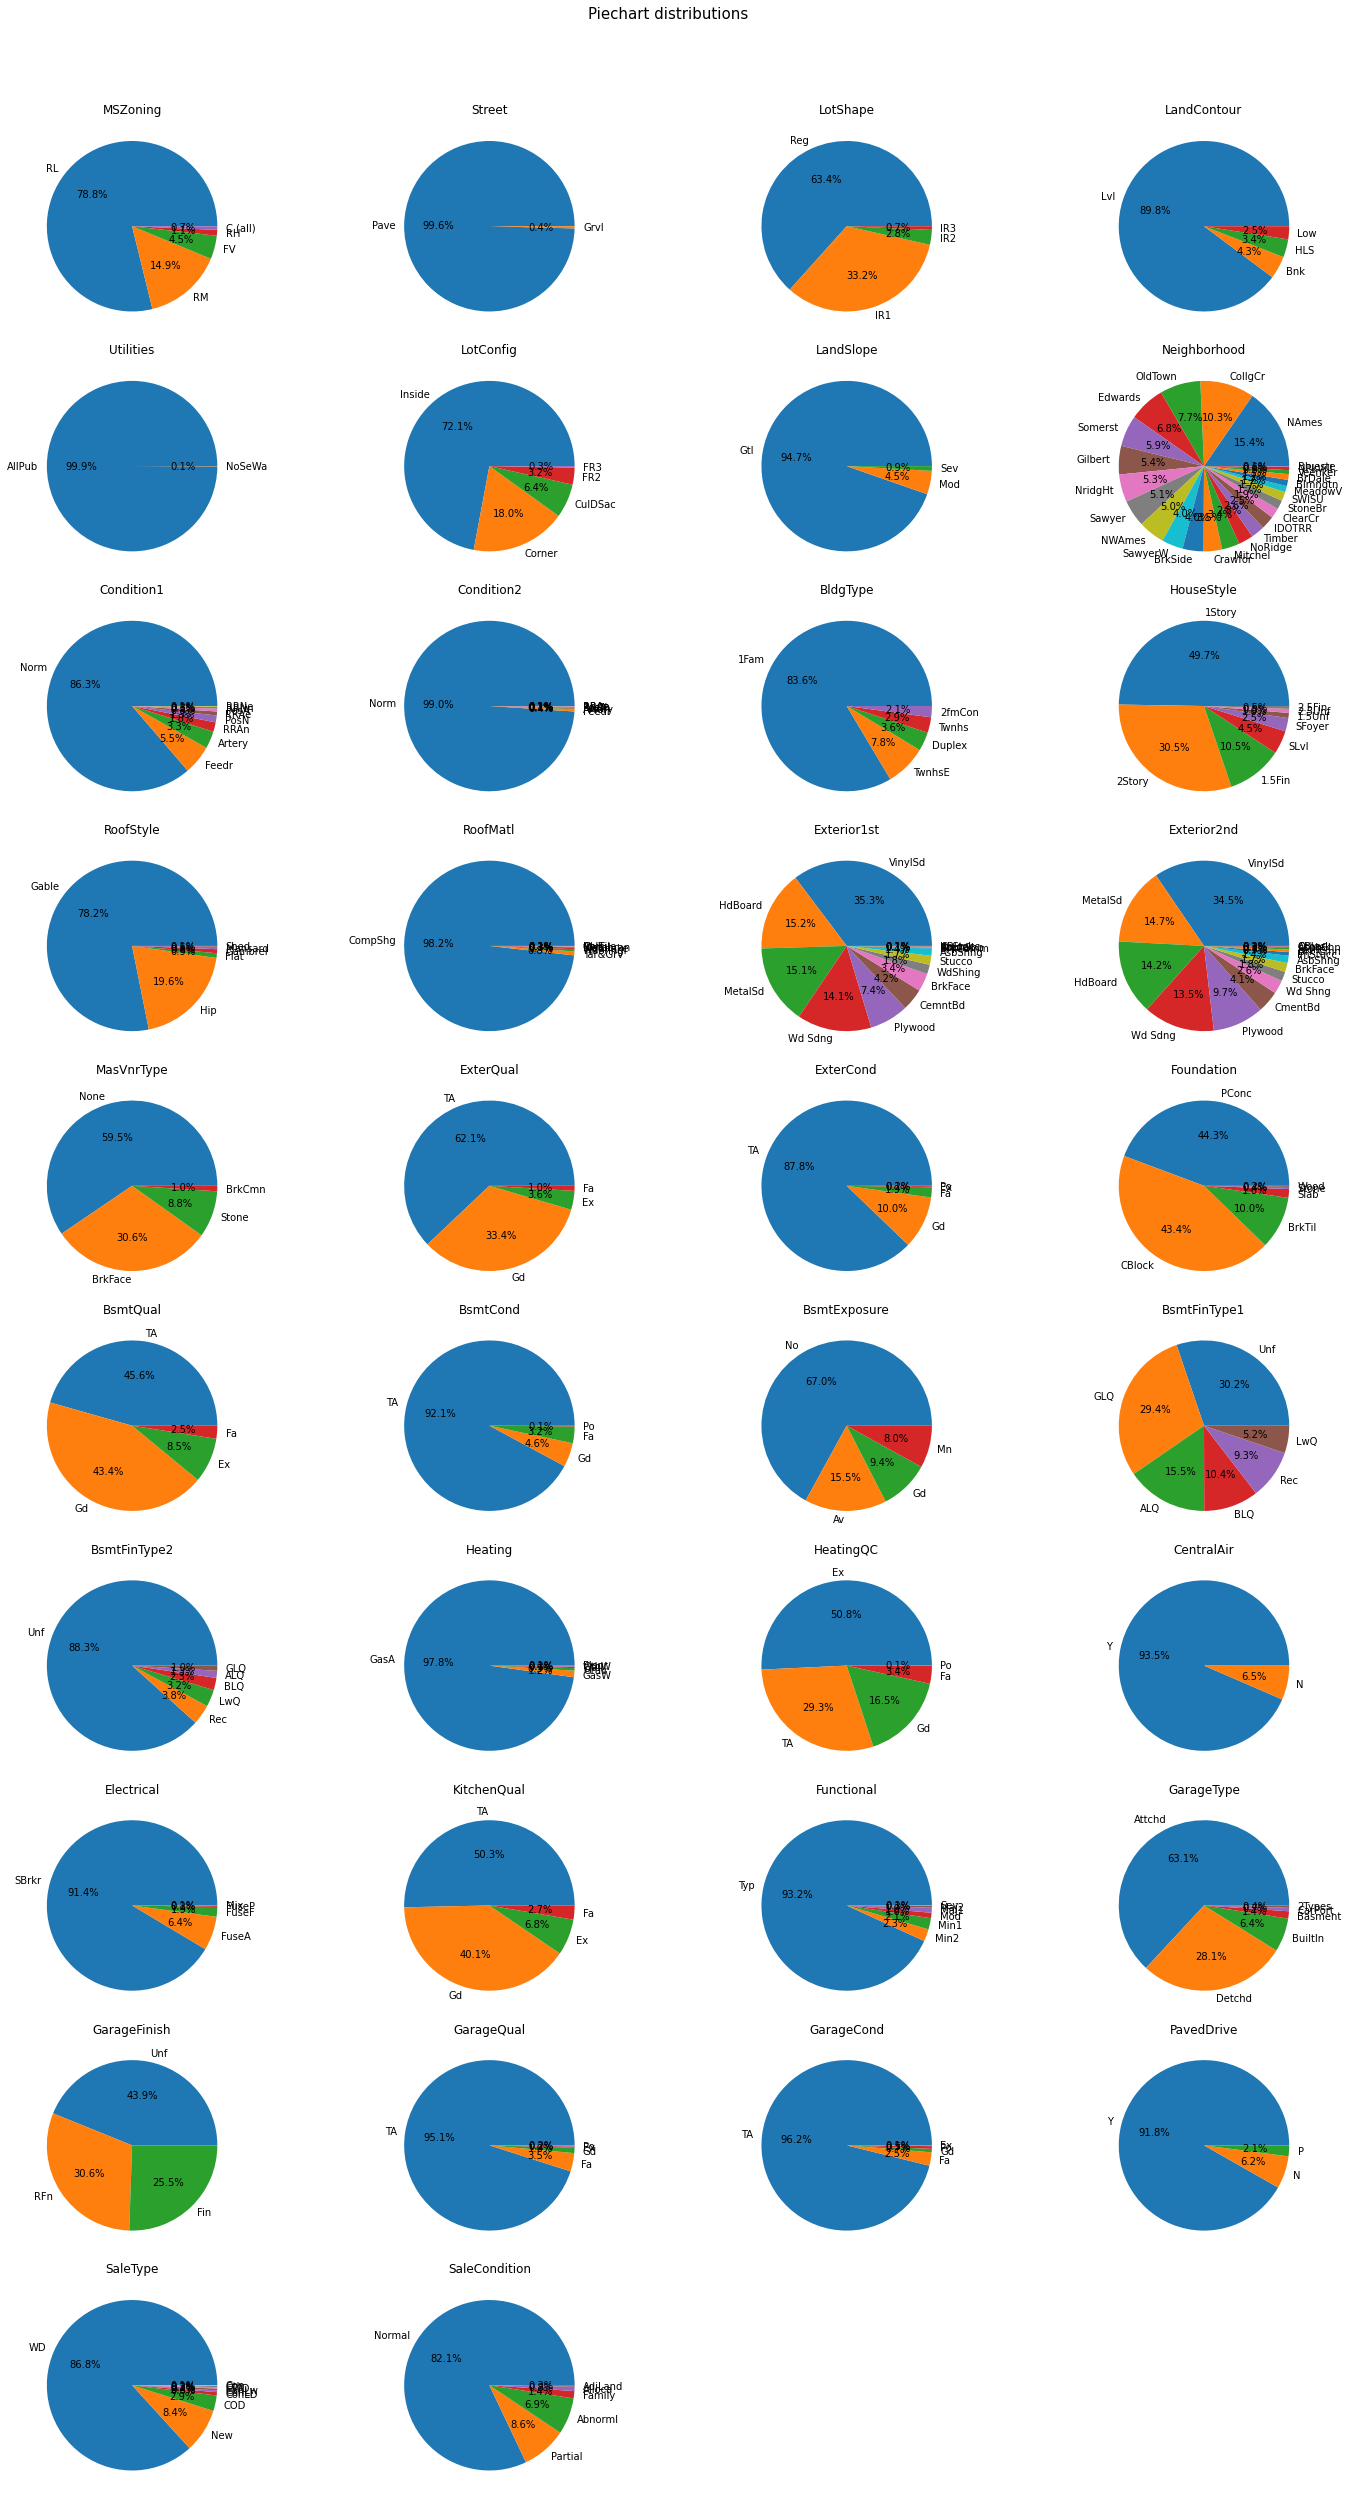

In [10]:
plt.figure(figsize=(20,40))
plt.suptitle("Piechart distributions",fontsize=15)

for i in range(1, categorical_data.shape[1]+1):
    plt.subplot(11,4,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(categorical_data.columns.values[i-1])
    values = categorical_data.iloc[:,i-1].value_counts(normalize=True).values
    index = categorical_data.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct='%.1f%%')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###CORRELATION WITH RESPONSE

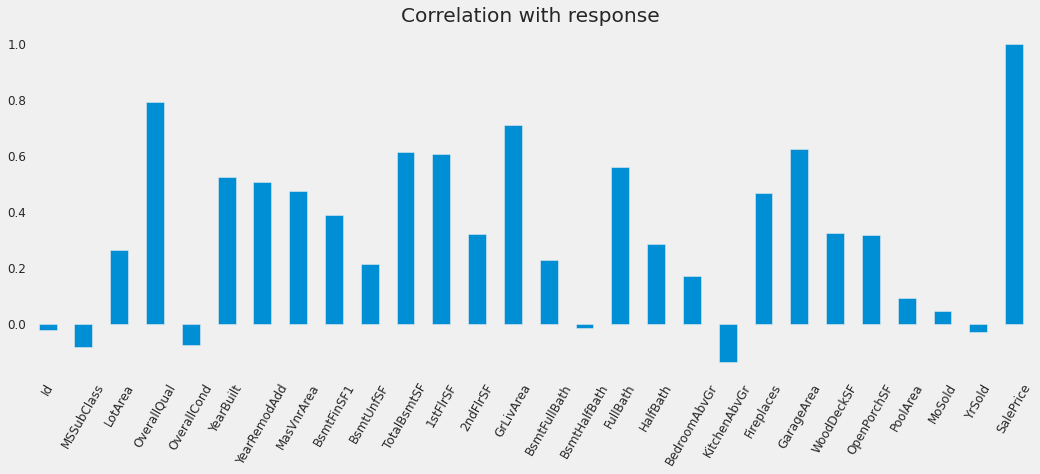

In [84]:
train_data.corrwith(train_data.SalePrice).plot.bar(figsize=(16,6), fontsize=12, rot=60, grid=False, title="Correlation with response")
plt.show()

*Saleprice is strongly correlated with overall quality, grade living area, garage cars and garage area*


###CORRELATION WITH ONE ANOTHER

<ipython-input-12-6cc8d620b259>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


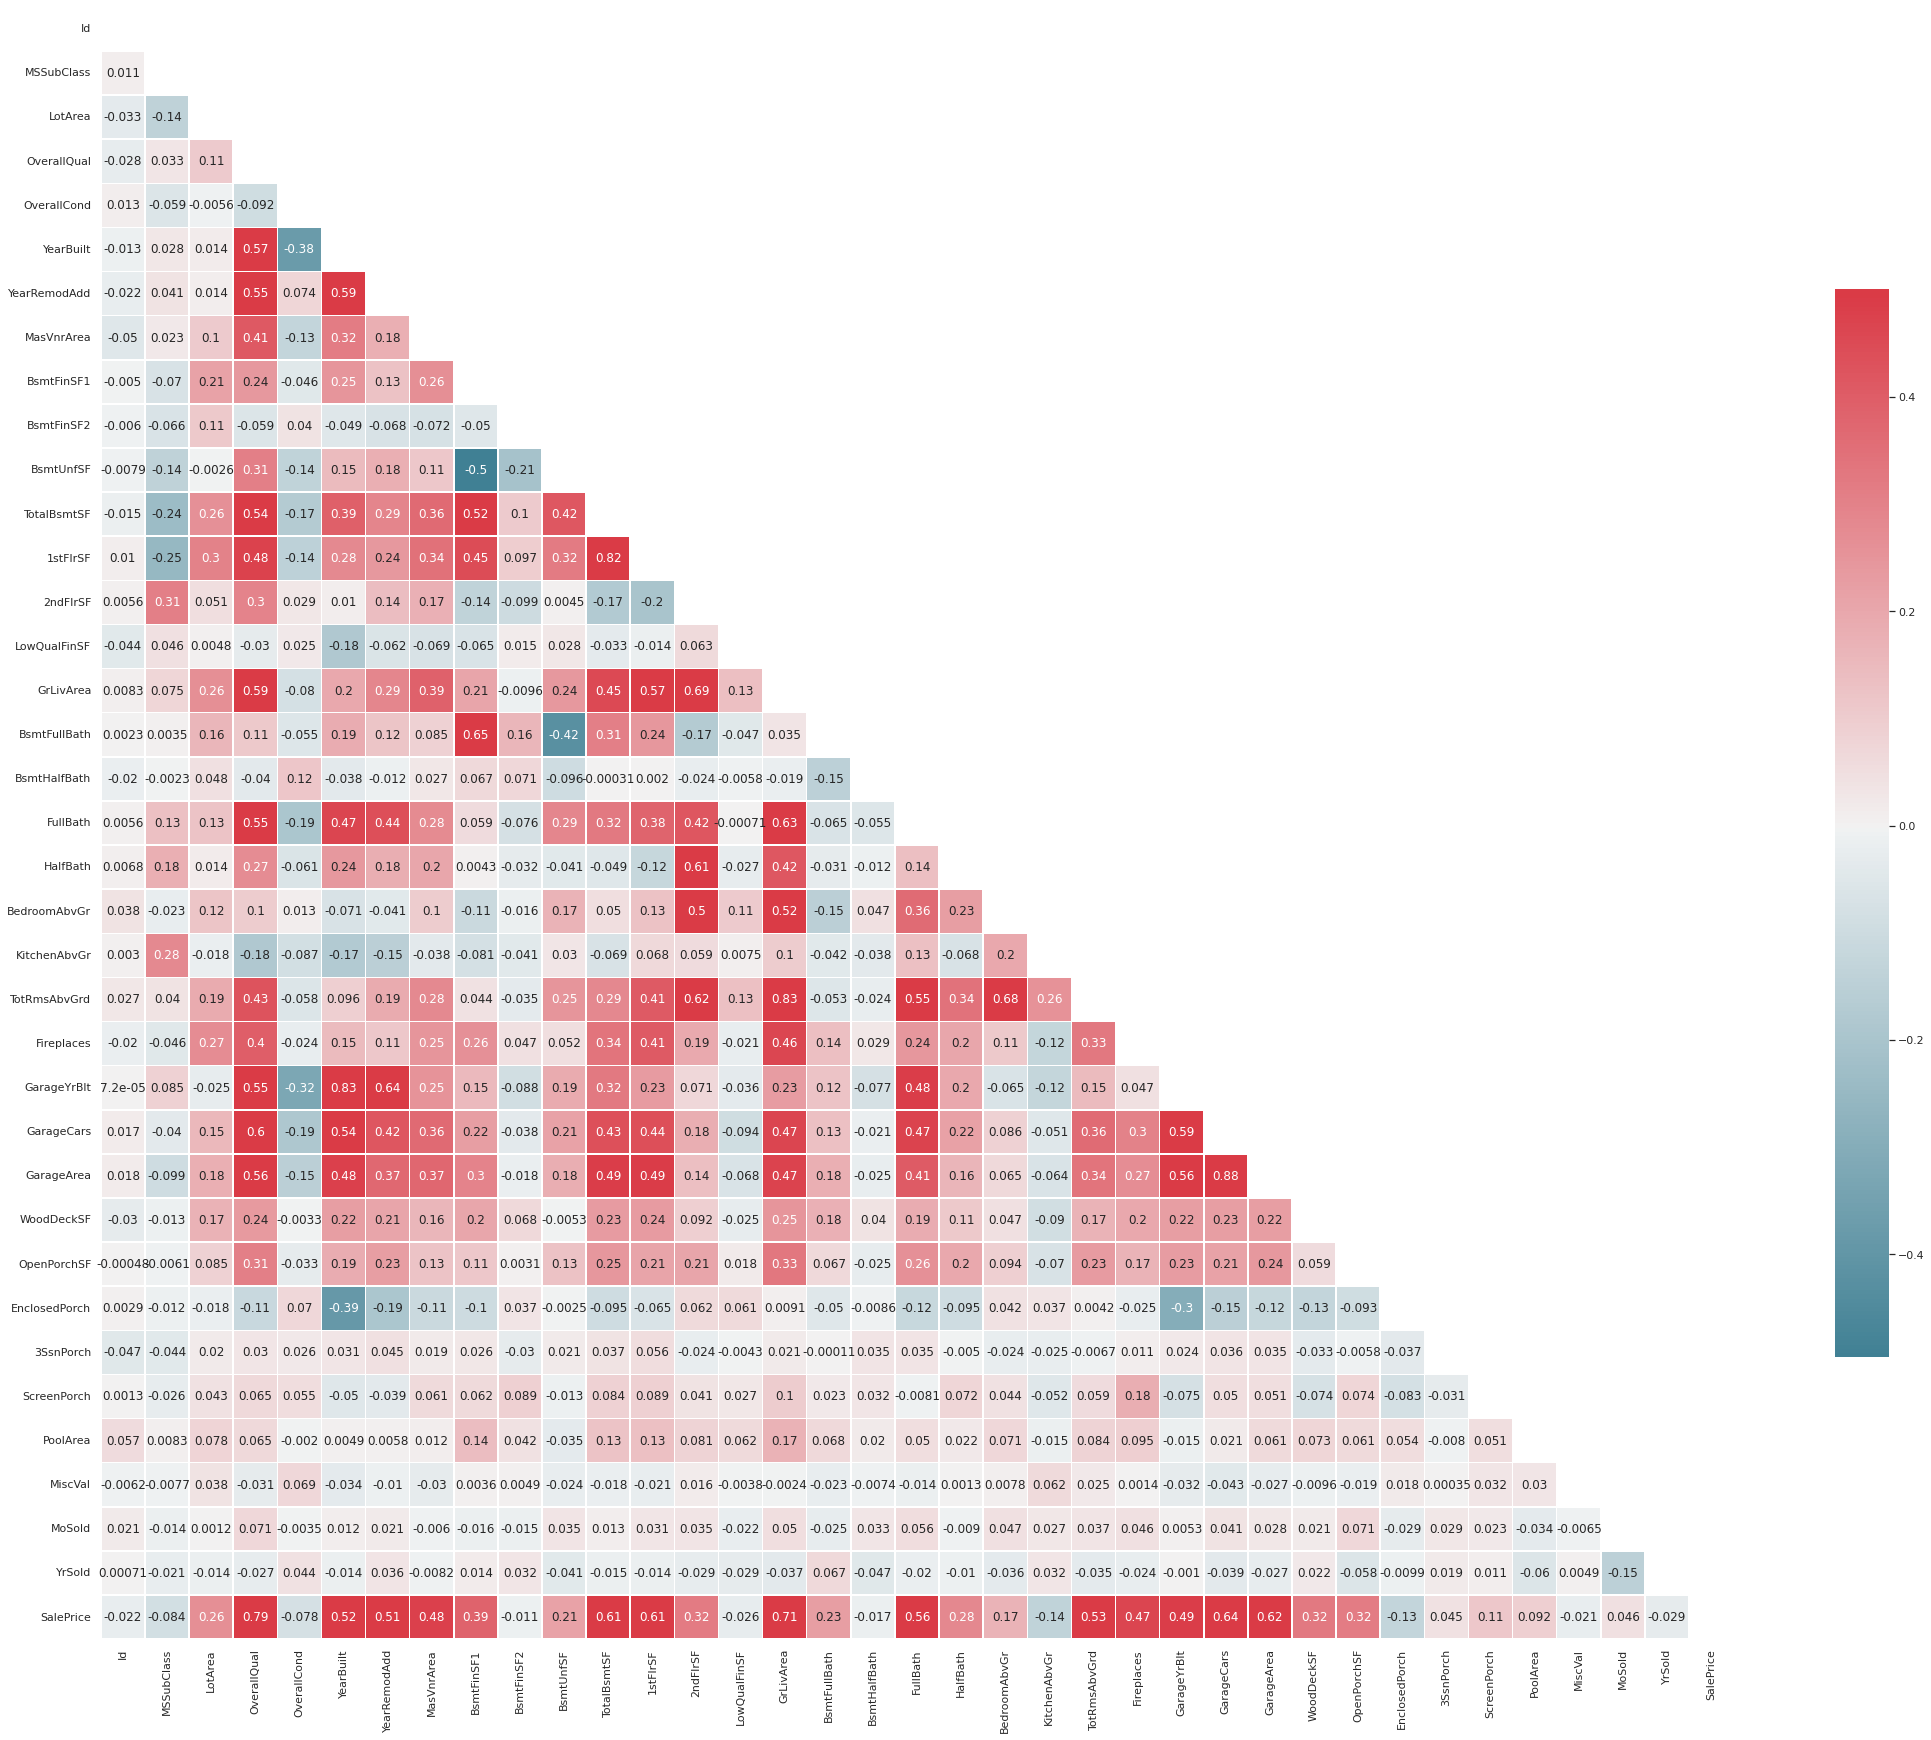

In [12]:
sns.set(style='white')
corr = train_data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax= plt.subplots(figsize=(30,30))
cmap= sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0, square=True, cbar_kws={"shrink":.5}, linewidths=0.5,fmt='.2g',annot=True)
plt.tight_layout()
plt.show();

Variables that are highly correlated:

GarageYrBlt and YearBuilt - 0.83

TotRmsAbvGrd and GrLivArea - 0.83

GarageArea and GarageCars - 0.88


Removing features that are nearly constant/ or have close to zero correlation with the target variable

In [13]:
train_data = train_data.drop(['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'], axis=1)

In [14]:
train_data = train_data.drop(['Street','Utilities','RoofMatl','Condition2'], axis=1)

Removing features that have high multicollinearity with another variable



In [15]:
train_data = train_data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageCars'], axis=1)

###Imputing Null Values

In [16]:
train_data[train_data.columns[train_data.isnull().any()]].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [17]:
train_data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [18]:
#filling the 8 null values in MasVnrArea with 0, as 0 is the highest occurring value in this column
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

In [19]:
#filling the null values in categorical columns with mode
for name in train_data.select_dtypes(exclude=np.number).columns:
    train_data[name] = train_data[name].fillna(train_data[name].mode()[0])

####Importing the test data that will be used to predict the final outcomes based on unseen data

In [20]:
test_data = pd.read_csv('test.csv')

In [21]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Dropping the columns that were removed in the training dataset

In [22]:
test_data = test_data.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature",'BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','GarageYrBlt','TotRmsAbvGrd','GarageCars','Street','Utilities','RoofMatl','Condition2'], axis=1)

Checking for null values in the test data

In [23]:
test_data[test_data.columns[test_data.isnull().any()]].isnull().sum()

MSZoning         4
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [24]:
#filling nulls in numerical columns
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(0)
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(0)
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(0)
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(0)
test_data['GarageArea'] = test_data['GarageArea'].fillna(0)

In [25]:
#filling nulls in categorical columns
for name in test_data.select_dtypes(exclude=np.number).columns:
    test_data[name] = test_data[name].fillna(test_data[name].mode()[0])

Combining Test and Train data to create dummy variables

In [26]:
all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

Creating dummy variables

In [27]:
dummies_data = pd.get_dummies(all_data.iloc[:,1:61])
dummies_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0


Split the data for train and test within training datset


In [28]:
X = dummies_data.iloc[0:1460,:]
y = train_data["SalePrice"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

##Linear Regression

In [76]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [77]:
#predicting the data for validation
y_pred = linear_model.predict(X_test)

In [78]:
# Print the mean squared error
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error:', round(rmse_lr, 2))
# Print the rsquared
r2_lr = r2_score(y_test, y_pred)
print('R Squared:', round(r2_lr, 4))

Root Mean Squared Error: 41061.51
R Squared: 0.7446


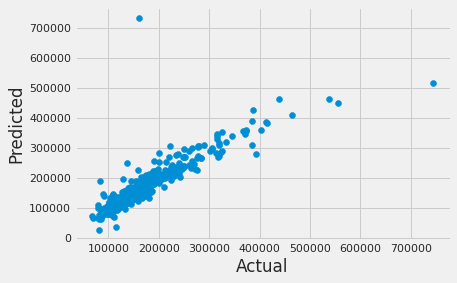

In [79]:
#visualizing the actual vs predicted variables on scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted');

##Lasso Regression

In [ ]:
# use the lasso regression algorithm with cross validation and obtain the optimum aplha value
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# load the dataset
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

In [35]:
#use the best alpha value to create a lasso model
model = Lasso(alpha=0.98)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.799e+11, tolerance: 6.798e+08
  model = cd_fast.enet_coordinate_descent(


In [36]:
# Print the mean squared error
rmse_lasso = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error:', round(rmse_lasso, 2))
# Print the rsquared
r2_lasso = r2_score(y_test, y_pred)
print('R Squared:', round(r2_lasso, 4))

Root Mean Squared Error: 41013.7
R Squared: 0.7452


##Random Forest

In [81]:
#Creating a random forest regression model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [82]:
#predict based on test data
y_pred = rf.predict(X_test)
# Print the mean squared error
rmse_rf = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error:', round(rmse_rf, 2))
# Print the rsquared
r2_rf = r2_score(y_test, y_pred)
print('R Squared:', round(r2_rf, 4))

Root Mean Squared Error: 32711.48
R Squared: 0.8379


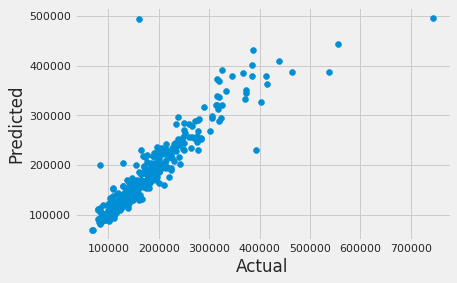

In [83]:
#plot the actual vs predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [89]:
## Perform Grid search to obtain the best parameters for random forest model
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_depth': [7,8,9,10],
    'max_features' : ['sqrt','auto'],
    'random_state' : [18]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
CV_rfr.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 18}

In [90]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 10, random_state = 18)
# Train the model on training data
rf.fit(X_train, y_train);

In [91]:
y_pred = rf.predict(X_test)
# Print the mean squared error
rmse_rf = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error:', round(rmse_rf, 2))
# Print the rsquared
r2_rf = r2_score(y_test, y_pred)
print('R Squared:', round(r2_rf, 4))

Root Mean Squared Error: 31801.18
R Squared: 0.8468


In [60]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [44]:
#get the most importat features to plot the importance visually
important_features = []
for i in range(len(feature_importances)):
  if feature_importances[i][1]>0:
      important_features.append(feature_importances[i])

important_feature_names = []
for i in range(len(important_features)):
  important_feature_names.append(important_features[i][0])

importance = []
for i in range(len(important_features)):
  importance.append(important_features[i][1])

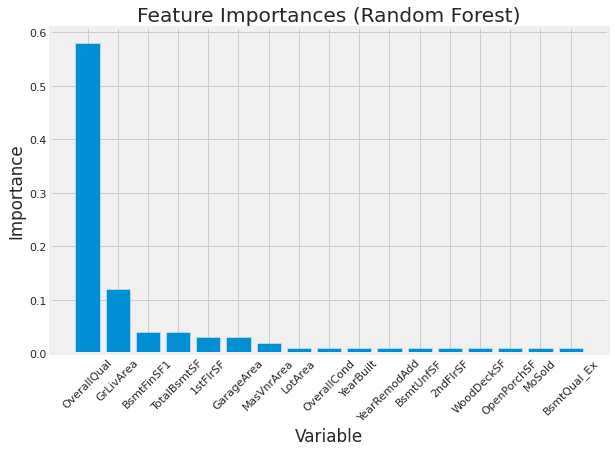

In [45]:
%matplotlib inline
plt.figure(figsize=(10,6))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, important_feature_names, rotation= 45)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances (Random Forest)');

#### We observe the Top 5 most important features from Random Forest model are:
OverallQuality: Rating for the overall material and finish of the house

GrLivArea: Above grade (ground) living area square feet

BsmtFinSF1: Rating of basement finished area

TotBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

##Gradient Boosting

In [92]:
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(learning_rate = 0.1,
                                n_estimators = 100,
                                max_depth= 3,
                                loss= 'squared_error',
                                random_state = 20)

# Fit the model
gbr.fit(X_train, y_train)

# Print the mean squared error
rmse_rf = mean_squared_error(y_test, gbr.predict(X_test), squared = False)
print('Root Mean Squared Error:', round(rmse_rf, 2))
# Print the rsquared
r2_rf = r2_score(y_test, gbr.predict(X_test))
print('R Squared:', round(r2_rf, 4))

Root Mean Squared Error: 26735.45
R Squared: 0.8917


In [93]:
# Get numerical feature importances
importances = list(gbr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [96]:
feature_importances

[('OverallQual', 0.53),
 ('GrLivArea', 0.16),
 ('TotalBsmtSF', 0.05),
 ('BsmtFinSF1', 0.04),
 ('GarageArea', 0.04),
 ('LotArea', 0.02),
 ('YearRemodAdd', 0.02),
 ('1stFlrSF', 0.02),
 ('OverallCond', 0.01),
 ('YearBuilt', 0.01),
 ('MasVnrArea', 0.01),
 ('2ndFlrSF', 0.01),
 ('Fireplaces', 0.01),
 ('MoSold', 0.01),
 ('BsmtQual_Ex', 0.01),
 ('GarageFinish_Unf', 0.01),
 ('MSSubClass', 0.0),
 ('BsmtUnfSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('PoolArea', 0.0),
 ('YrSold', 0.0),
 ('MSZoning_C (all)', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.0),
 ('LotShape_IR1', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_Bnk', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_Corner', 0.0),
 ('LotConfig_CulDSa

In [95]:
#get the most importat features to plot the importance visually
important_features = []
for i in range(len(feature_importances)):
  if feature_importances[i][1]>0:
      important_features.append(feature_importances[i])

important_feature_names = []
for i in range(len(important_features)):
  important_feature_names.append(important_features[i][0])

importance = []
for i in range(len(important_features)):
  importance.append(important_features[i][1])

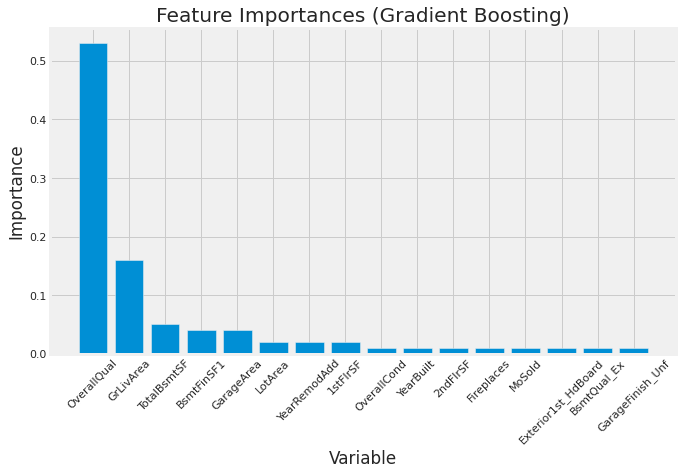

In [64]:
%matplotlib inline
plt.figure(figsize=(10,6))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, important_feature_names, rotation= 45)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances (Gradient Boosting)');

#### We observe the Top 5 most important features from Gradient Boosting algortihm are:
OverallQuality: Rating for the overall material and finish of the house

GrLivArea: Above grade (ground) living area square feet

TotBsmtSF: Total square feet of basement area

BsmtFinSF1: Rating of basement finished area

GarageArea: Size of Garage Area in square feet

Thus, we observe that Gradient Boosting gives the best performance with:
1. Minimum rmse score of 26735.45
2. Maximum r-squared of 89.17%

Predicting on test data to be submitted on data science competition using the gradient boosting model

In [66]:
y_test_pred = gbr.predict(dummies_data.iloc[1460:,:])


In [67]:
submission_data = pd.DataFrame(pd.Series(y_test_pred), columns = ['SalePrice'])

In [68]:
submission_ids = test_data[['Id']]

In [69]:
submission = pd.concat([submission_ids,submission_data], axis=1)
submission

,Id,SalePrice
0,1461,121823.862897
1,1462,157544.953801
2,1463,179786.031911
3,1464,187496.692164
4,1465,193124.107644
...,...,...
1454,2915,83033.792982
1455,2916,83629.936356
1456,2917,148412.173774
1457,2918,123543.730916


In [70]:
submission.to_csv('submission.csv', index = False)

In [71]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>